In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV


# Import Data

In [2]:
from sklearn.datasets import make_moons

X,y= make_moons(n_samples=500, noise = .2)

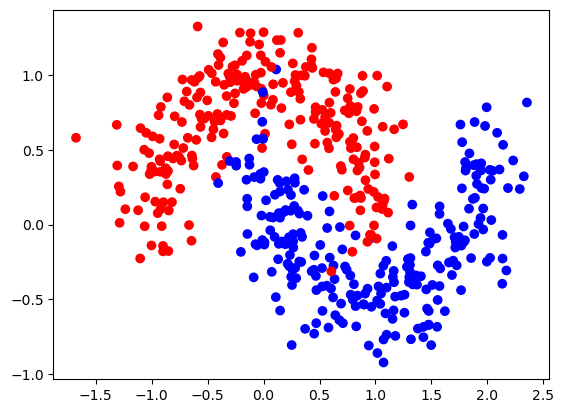

In [3]:
# scatter plot

colors = ['r', 'b']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(X[:,0], X[:,1], c=vectorizer(y))



# GridSearch on Decision Tree

GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. 

GridSearchCV performs an exhaustive search over a specified hyperparameter grid, 

trying all possible combinations of hyperparameter values. 

It uses cross-validation to evaluate the model's performance for each combination of hyperparameters.

In [4]:
#test-train split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [5]:
#train decision tree

clf = DecisionTreeClassifier() #clf to denote classifier
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [6]:
# search over a range of max_depth

params =  {    
    'max_depth': [ 3,4,5,6,7,8,9,10] }

# Create gridsearch instance

grid = GridSearchCV(estimator=clf,
                    param_grid=params,
                    cv=5,
                    n_jobs=1,
                    verbose=2)

# Fit the model
grid.fit(X_train, y_train)

# Assess the score
grid.best_score_, grid.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................

(0.9342857142857144, {'max_depth': 7})